In [1]:
!pip install vk_api

In [2]:
import vk_api

In [3]:
vkApiSession= vk_api.VkApi(token="vk1.a.vW70ZdDvxtVK9YAW98sP6zThPn7FSkyYusK8txhSG3mSl3nuuI-POJXK5BuZeeW-NsV3EePdQRpIrv_WURQzqt-hgAqoOikDT02nYAUXwM84lJ3CFaWiHEniPzZZRM8b7ydA2GMv2icQbe9eks9CPapfNSUtxoemSoCwXHlK3oSf1jSgRBtnz6jZAxVBRjU8gYesb-1MF1ItK4iVe9xclg")

vk = vkApiSession.get_api()

In [4]:
posts = vk.wall.get(owner_id=-20629724, count=100)['items'][10]
posts

{'inner_type': 'wall_wallpost',
 'ads_easy_promote': {'type': 2,
  'text': 'Что-то пошло не так.',
  'label_text': '',
  'button_text': '',
  'is_ad_not_easy': False},
 'comments': {'can_post': 1, 'count': 5, 'groups_can_post': True},
 'marked_as_ads': 0,
 'activity': {'comments': [{'id': 1601444,
    'from_id': 49637527,
    'date': 1734629277,
    'text': 'Покупайте биткоин глупцы',
    'post_id': 1601435,
    'owner_id': -20629724,
    'parents_stack': [],
    'likes': {'can_like': 1,
     'count': 1,
     'user_likes': 0,
     'can_like_by_group': 0,
     'group_liked': False},
    'thread': {'count': 0}}],
  'post_author_id': -20629724,
  'type': 'comments',
  'discriminator': 'reply'},
 'hash': '8czCTaJTa1WAeNQvVk4VAJLNiFOP',
 'type': 'post',
 'push_subscription': {'is_subscribed': False},
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1734624051,
    'id': 457329800,
    'owner_id': -20629724,
    'access_key': '7b38cf3be46ceaecbb',
    'post_id': 16

In [77]:
import csv
import pandas as pd

def scrape_wall_data(token, owner_id, count=10):
    try: # блок try-except для обработки возможных ошибок при взаимодействии с API ВКонтакте.
        vk_session = vk_api.VkApi(token=token) #выполянем запрос по токену
        vk = vk_session.get_api() #получаем объект API, с помощью которого будут выполняться запросы к серверам ВКонтакте.
       
        # Метод wall.get
        posts = vk.wall.get(owner_id=owner_id, count=count)['items'] # записываем записи со стены сообщества в переменную posts

        # Хранилище для данных
        scraped_data = [] # пустой список для добавления данных с каждой записи при иритации 

        # Парсинг
        for post in posts:
            post_data = {
                'post_id': post['id'],
                'text': post['text'],
                'likes': post['likes'],
            }
            scraped_data.append(post_data)

        return scraped_data

    except vk_api.exceptions.ApiError as e:
        print(f"Error accessing VK API: {e}")
        return []

In [78]:
def save_to_csv(data, file_name='vk_wall_posts.csv'): #сохраним наши данные в файл формата csv
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['post_id', 'text','likes'])
        writer.writeheader()
        for row in data:
            writer.writerow(row)

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
def stats(data):
    df = pd.DataFrame(data)
    
    df['like_count'] = df['likes'].apply(lambda x: x['count']) # посмотрим на количество лайков под постами 
    df.drop('likes', axis=1, inplace=True)
    
    # визализация статистики по количеству лайков
    plt.bar(df['post_id'], df['like_count'])
    plt.xlabel('Post ID')
    plt.ylabel('Number of Likes')
    plt.title('Likes per Post')
    plt.show()
    


    print(f'Посмортим на общую информацию: \n {df.describe()}')
    print('\n')
    print(df.info())
    print('\n')
    print(f'Статистика по первым пяти постам\n{df.head()}')
    pass

Посмотрим на полученные данные:
[{'post_id': 20337, 'text': 'Уважаемые студенты, преподаватели и сотрудники Питерской Вышки! \n \nБудьте внимательны: вновь участились случаи, когда якобы от имени руководства НИУ ВШЭ и структурных подразделений университета мошенники совершают звонки и рассылают сообщения. \n \nНе переходите по подозрительным ссылкам, не сообщайте личную и служебную информацию посторонним, соблюдайте цифровую гигиену. Рекомендуем заблокировать неизвестный номер/аккаунт, с которого вам поступило сообщение или звонок.', 'likes': {'can_like': 1, 'count': 5, 'user_likes': 0, 'can_publish': 1, 'repost_disabled': False}}, {'post_id': 20336, 'text': 'Историки Питерской Вышки изучили почти 4000 жителей Старой Руссы XV–XVII веков 📜 \n \nЦентр исторических исследований вместе с НовГУ несколько лет анализируют, как формировалось российское политическое пространство в малых городах России. За 3 года совместной работы они создали большую базу данных о жителях Старой Руссы периода ра

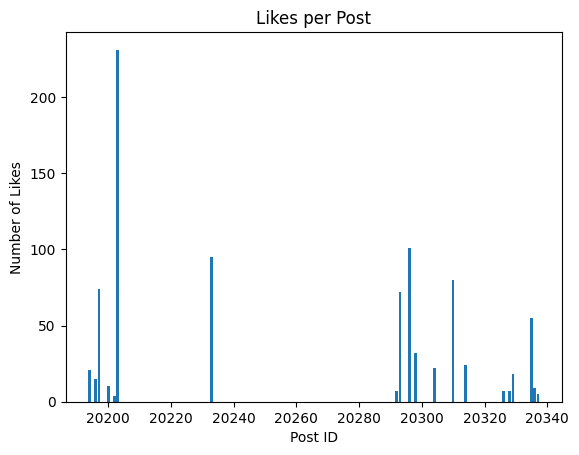

Посмортим на общую информацию: 
             post_id  like_count
count     20.000000   20.000000
mean   20276.150000   44.450000
std       56.857416   54.579228
min    20194.000000    4.000000
25%    20202.750000    8.500000
50%    20297.000000   21.500000
75%    20326.500000   72.500000
max    20337.000000  231.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   post_id     20 non-null     int64 
 1   text        20 non-null     object
 2   like_count  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes
None


Статистика по первым пяти постам
   post_id                                               text  like_count
0    20337  Уважаемые студенты, преподаватели и сотрудники...           5
1    20336  Историки Питерской Вышки изучили почти 4000 жи...           9
2    20335  Сегодня в Питерской Вышке началась зимняя сесс

In [114]:
def main():
    # Введите ваш токен VK API
    token = "vk1.a.vW70ZdDvxtVK9YAW98sP6zThPn7FSkyYusK8txhSG3mSl3nuuI-POJXK5BuZeeW-NsV3EePdQRpIrv_WURQzqt-hgAqoOikDT02nYAUXwM84lJ3CFaWiHEniPzZZRM8b7ydA2GMv2icQbe9eks9CPapfNSUtxoemSoCwXHlK3oSf1jSgRBtnz6jZAxVBRjU8gYesb-1MF1ItK4iVe9xclg"

    # Введите ID сообщества
    owner_id = -299

    # Введите количество публикаций для скрейпинга
    num_posts = 20

    wall_data = scrape_wall_data(token, owner_id, num_posts)
    print('Посмотрим на полученные данные:')
    print(wall_data)
    print('\n')
    if wall_data:
        save_to_csv(wall_data)

        stats(wall_data)
    else:
        print("No data")

if __name__ == "__main__":
    main()